In [339]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['2017.csv', '2016.csv', '2015.csv']


In this kernell, we will be focusing on data set of 2017, so lets start with opening data.

In [340]:
data = pd.read_csv("../input/2017.csv")
data.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [342]:
data.isnull().values.any() # So we don't have any missing value in data
    

False

Lets divide the countries as living is good or bad according to their happiness score. So if happiness score is larger than 5 , then we call these type of countries good for living and if score is less than 5 we call them bad for living.

In [343]:
data.columns = data.columns.str.replace(".","_")
data

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [344]:
good_bad_list = ["good" if each >=5 else "bad" for each in data.Happiness_Score]
good_bad_list

['good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad'

Number of good country for living:  98
Number of bad country for living:  57


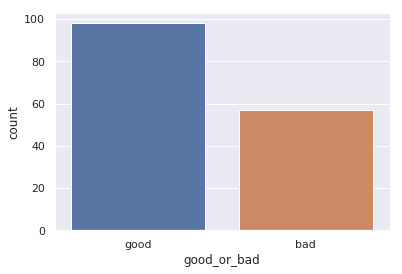

In [345]:
data["good_or_bad"] = good_bad_list
y = data["good_or_bad"]
x= data.drop(["good_or_bad","Happiness_Rank","Country" ],axis=1)

ax = sns.countplot(data["good_or_bad"], label = "Count")
Good, Bad = data["good_or_bad"].value_counts()
print("Number of good country for living: ", Good)
print("Number of bad country for living: ", Bad)


Lets compare features 2 by 2

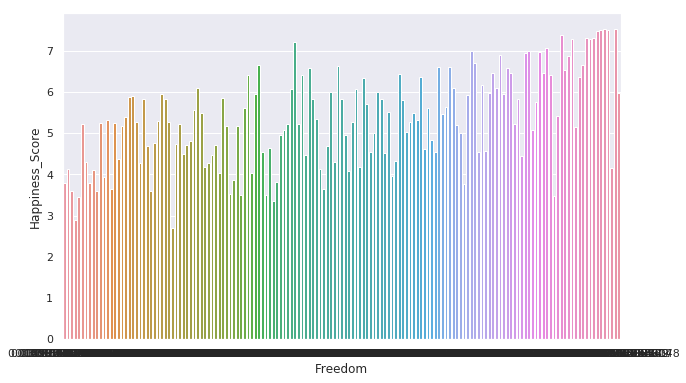

In [346]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = "Freedom", y ="Happiness_Score",data = data)

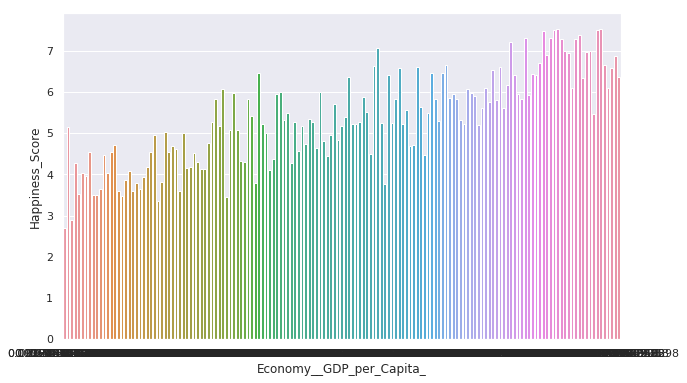

In [347]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "Economy__GDP_per_Capita_", y = "Happiness_Score", data = data)

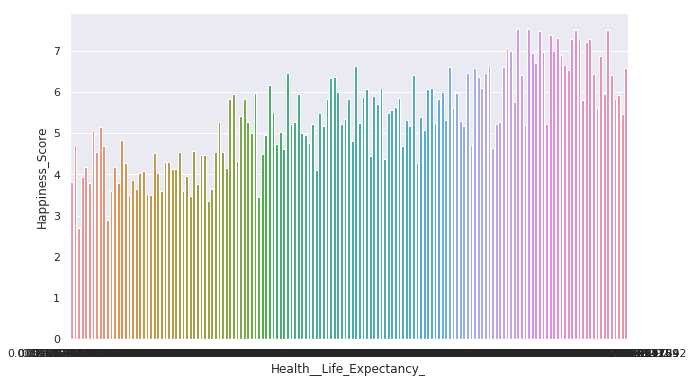

In [348]:
fig =plt.figure(figsize=(10,6))
sns.barplot(x = "Health__Life_Expectancy_", y = "Happiness_Score",data = data)

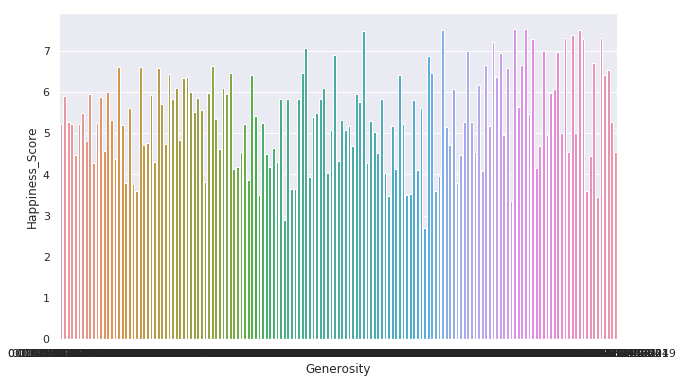

In [349]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = "Generosity", y ="Happiness_Score", data = data)

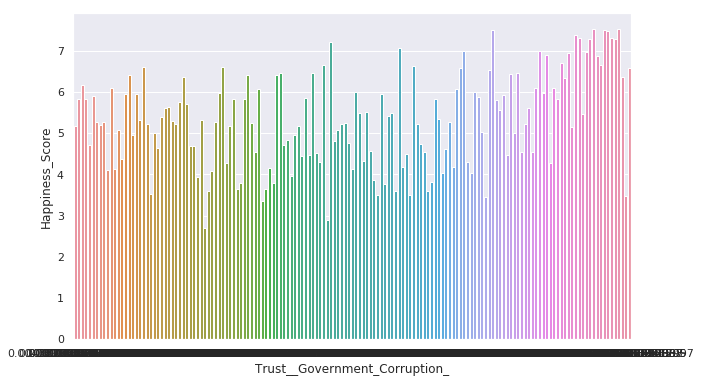

In [350]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x="Trust__Government_Corruption_", y = "Happiness_Score", data = data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

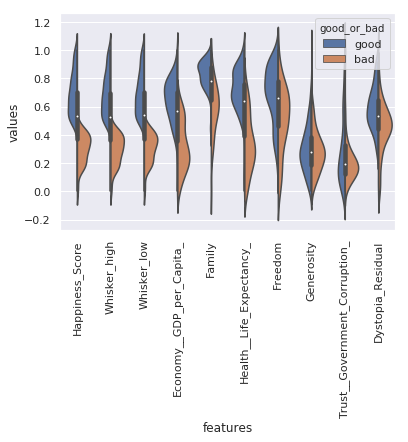

In [351]:
data_normalized = (x - x.min())/(x.max()-x.min()) # normalization

data = pd.concat([y, data_normalized], axis =1)

data = pd.melt(data, id_vars = "good_or_bad",
                      var_name = "features",
                      value_name = "values")

sns.violinplot(x="features", y ="values", hue = "good_or_bad",
               data= data, split ="True")

plt.xticks(rotation=90)


We can make these analyze better with joint plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



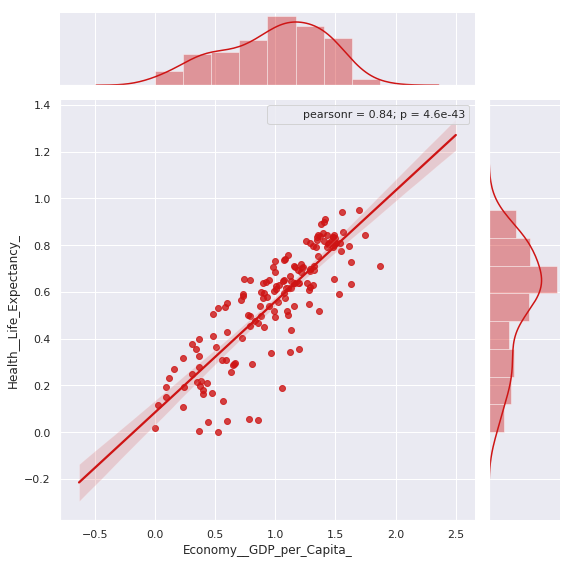

In [352]:
sns.set(style="darkgrid", color_codes = True)
ax = sns.jointplot(x.loc[:,"Economy__GDP_per_Capita_"],
                   x.loc[:,"Health__Life_Expectancy_"],
                  data = x, kind ="reg", height = 8, color="#ce1414")
ax.annotate(stats.pearsonr)
plt.show()

In the upper graph,we have a 0.84 pearsonr score so we can easily say that these two features are correlated each other.

Now, lets make a comparision between top 4 countries with the highes GDP per capita

In [353]:
new_data = pd.read_csv("../input/2017.csv")
created_data = pd.concat([new_data["Country"], new_data["Happiness.Rank"],y, data_normalized, ], axis =1)
created_data.rename(columns = {"Happiness.Rank" : "Happiness_Rank"}, inplace = True)

import plotly.graph_objs as go
defined_data = created_data[created_data.Economy__GDP_per_Capita_ > 0.8].iloc[:4,:]
#defined_data
trace1 =go.Bar(
                x = defined_data.Country,
                y = defined_data.Trust__Government_Corruption_,
                name = "Trust to Government Corruption",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                            )
trace2= go.Bar(
                x = defined_data.Country,
                y = defined_data.Dystopia_Residual,
                name = "Dystopia Residual",
     marker = dict(color = 'rgba(15, 44, 45, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    
)

data = [trace1, trace2]


layout = {
        "xaxis" : { "title" :" Top 4 Country"},
        "barmode" : "relative",
        "title" : "Dystopia Residual and Trust to Government Corruption of top 4 countries"
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)


In [354]:
new_data = pd.read_csv("../input/2017.csv")
created_data = pd.concat([new_data["Country"], new_data["Happiness.Rank"],y, data_normalized, ], axis =1)
created_data.rename(columns = {"Happiness.Rank" : "Happiness_Rank"}, inplace = True)
created_data

trace1 = go.Scatter( x = created_data.Happiness_Rank , 
                    y = created_data.Economy__GDP_per_Capita_ ,
                    mode = "lines",
                    name = "GDP per Capita",
                    marker = dict(color = "rgba(150, 25, 125, 0.5)"),
                    text = created_data.Country
                    
)

trace2 = go.Scatter ( x = created_data.Happiness_Rank,
                    y = created_data.Family,
                    mode = "lines",
                    name = "Family",
                    marker = dict(color = "rgba(5,150, 125, 0.8)"),
                    text = created_data.Country
                    )


trace3 = go.Scatter ( x = created_data.Happiness_Rank,
                    y = created_data.Health__Life_Expectancy_,
                    mode = "lines",
                    name = "Life Expectancy",
                    marker = dict(color = "rgba(0, 0, 225, 0.4)"),
                    text = created_data.Country
                    )

data = [trace1, trace2, trace3]

layout = dict(title = "Effect of Family, GDP and Life Expectancy of Happiness",
             xaxis =dict( title ="World Rank",ticklen = 5, zeroline = False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

After we figure out these datas, we can predict something. So we can look the heatmap of features.

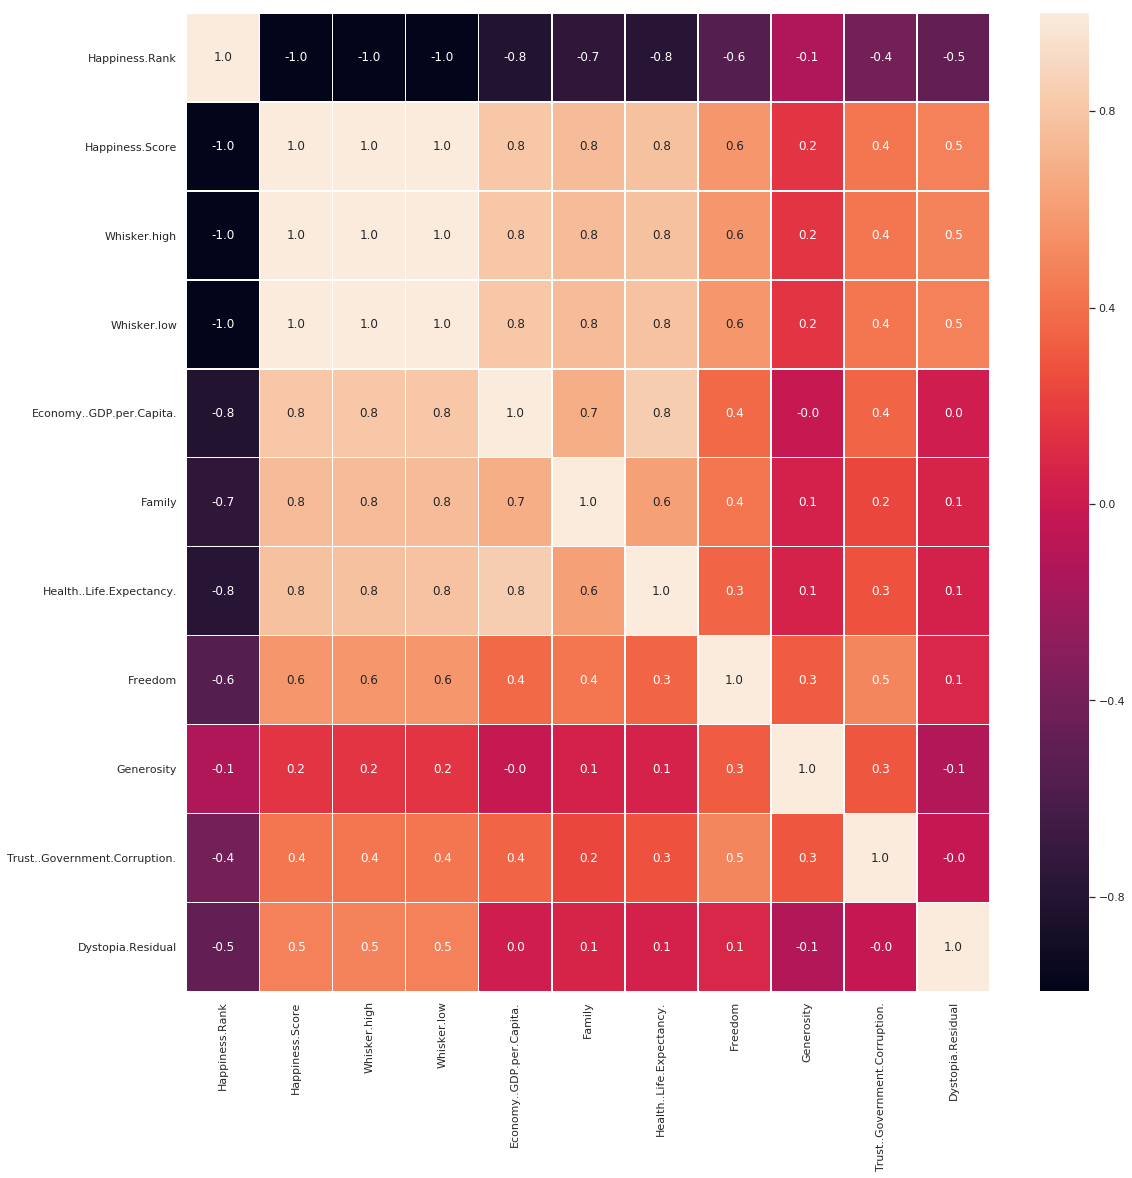

In [355]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(new_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [365]:
x_norm = (x-x.min())/(x.max()-x.min()) # Normalization
x_norm.drop(["Happiness_Score"], axis =1, inplace = True)


from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x_norm, y,
                                                   test_size =0.3, random_state = 42)


,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,0.994201,1.000000,0.864065,0.952160,0.839045,0.965323,0.431957,0.680505,0.693215
1,0.991528,0.996514,0.792394,0.963086,0.834726,0.951019,0.423924,0.863156,0.706605
2,1.000000,0.981126,0.791458,1.000000,0.877892,0.952775,0.567420,0.330657,0.709893
3,0.987333,0.989245,0.836545,0.941845,0.903779,0.942001,0.346686,0.790440,0.693102
4,0.980138,0.986065,0.771648,0.956334,0.852200,0.938780,0.292913,0.824047,0.749120
5,0.959092,0.969147,0.803919,0.887224,0.853821,0.889306,0.561393,0.608781,0.699705
6,0.950048,0.953219,0.790695,0.919765,0.878951,0.928374,0.519691,0.618925,0.660450
7,0.949020,0.953400,0.751407,0.961269,0.860207,0.932873,0.596611,0.824489,0.609053
8,0.941575,0.948441,0.798810,0.917786,0.875073,0.931144,0.459862,0.827896,0.627698
9,0.944215,0.945909,0.793480,0.937580,0.888777,0.913952,0.569996,0.648673,0.615898


Firstly, as you can see from the upper lines, we divide data into train and test, so now we can start with KLNN algorithm.

In [357]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbor is knn value
knn.fit(x_train, y_train)
prediction = knn.score(x_test, y_test)

print("knn value : {},  score : {}".format(3,prediction))

knn value : 3,  score : 0.9787234042553191


We get 97% prediction rate which is really good.

In [358]:
y_pred = knn.predict(x_test)
y_true = y_pred

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
cm

array([[14,  0],
       [ 0, 33]])

In [359]:
x_norm = (x-x.min())/(x.max()-x.min()) # Normalization

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x_norm, y,
                                                   test_size =0.3, random_state = 42)



In [364]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state =42)

rf.fit(x_train,y_train)
print("Score : {}".format(rf.score(x_test,y_test)))

Score : 1.0
